# read data

In [63]:
import pandas as pd
from scopy.ScoDruglikeness import PC_properties
import matplotlib.pyplot as plt
import numpy as np
from rdkit import Chem
import csv

In [64]:
data = pd.read_csv('/mnt/d/CDK46/CDK12-VS/cdk12_vs_score.csv')
data

,smiles,transformer score
0,CCOc1ccccc1-c1noc(C)n1,15.563509
1,CCCCCCCCCCOC1OC(COC(C)=O)C(OC(C)=O)C(OC(C)=O)C...,15.461985
2,CCC(/C=C(\C#N)C(N)=C(C#N)C#N)CC,15.221239
3,CC12CCC(C)(CC1)C1C(=O)NNC(=O)C12,15.149906
4,COCC1OC(OC(C)(C)C2CCC3(C)C=C(C4CCC5C4(C)CC(O)C...,15.045589
...,...,...
239995,Cc1cccc(Cc2c(C)nc(C3CC3)nc2N2CCN(C(=O)N(C)C)CC...,6.097244
239996,COc1ccc(S(=O)(=O)N(Cc2csc(COc3cccc(C)c3)n2)CC(...,6.097240
239997,O=C(NC1CCCCC1)ON=C1c2ccccc2-c2ccccc21,6.097238
239998,NC(=O)c1ccnc(CC2COc3ccccc3C2)c1,6.097234


In [65]:
data['mol'] = data['smiles'].apply(Chem.MolFromSmiles)

In [66]:
props = PC_properties(data['mol'], n_jobs=4)
properties = props.GetProperties(items=['MW','logP','logD','nHD', 'nHA', 'TPSA','nRot'])
properties_df = pd.DataFrame(properties)
data_new = pd.concat([data, properties_df], axis=1)

In [67]:
data_new.to_csv("data_pro-pred.csv")

In [38]:
def plot_mw_logP_tpsa(data):
    fig, axes = plt.subplots(nrows=1, ncols=3)
    min_ = min(data['MW'])-10
    max_ = max(data['MW']) +10
    index = np.arange(min_, max_, (max_ - min_)/20)
    data['MW'].plot(kind='hist', bins=index, rwidth=0.8, ax=axes[0], title='MW')
    plt.xticks(index)

    min_ = min(data['logP'])-0.5
    max_ = max(data['logP']) + 0.5
    index = np.arange(min_, max_, (max_ - min_)/20)
    data['logP'].plot(kind='hist', bins=index, rwidth=0.8, ax=axes[1], title='cLogP')
    plt.xticks(index)
   
    min_ = min(data['TPSA'])-5
    max_ = max(data['TPSA'])+5
    index=np.arange(min_, max_, int((max_ - min_)/20))
    data['TPSA'].plot(kind='hist', bins=index, rwidth=0.8, ax=axes[2], title='TPSA')
    plt.xticks([0, 100, 200])

    plt.show()


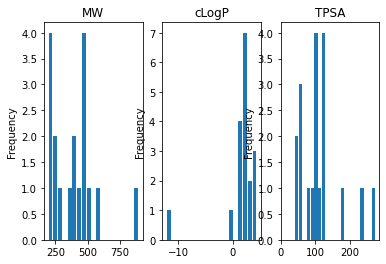

In [39]:
plot_mw_logP_tpsa(data_new)

In [8]:
def plot_nrot_hbond(data):
    fig, axes = plt.subplots(nrows=1, ncols=3)

    min_ = min(data['nRot'])
    max_ = max(data['nRot']) + 2
    index = np.arange(min_, max_, (max_ - min_)/10)
    data['nRot'].plot(kind='hist', bins=index, rwidth=0.8, ax=axes[0], title='n-Rot')
    plt.xticks(index)
    
    
    min_ = min(data['nHA'])
    max_ = max(data['nHA']) + 2
    index = np.arange(min_, max_, (max_ - min_)/10)
    data['nHA'].plot(kind='hist', bins=index, rwidth=0.8, ax=axes[1], title='H-Acc')
    plt.xticks(index)


    min_ = min(data['nHD'])
    max_ = max(data['nHD']) + 2
    index=np.arange(min_, max_, (max_ - min_)/6)
    data['nHD'].plot(kind='hist', bins=index, rwidth=0.8, ax=axes[2], title='H-Don')
    plt.xticks(index)
    plt.show()



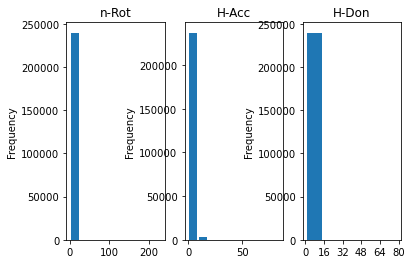

In [9]:
plot_nrot_hbond(data_new)